<a href="https://colab.research.google.com/github/Sharminrahi/Deep-Learning/blob/main/Assignment_2_Q2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
**Download the St. John's temperature dataset from Brightspace. This dataset records hourly reanalysis data of the two-meter temperature near St. John's, NL from 2011{2020(10 years). The goal is to develop a feedforward neural network to predict the temperature for the next 6 hours.**

In [ ]:
!pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from matplotlib.pyplot import figure
import seaborn as sns
import tensorflow as tf

In [ ]:
#Mount drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from pickle import TRUE
df = Dataset('/content/drive/MyDrive/tempStJohns_v2.nc')

# Reading dataset 
#df = nc.Dataset(file_path, 'r')
print(df)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-02-03 00:49:51 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data2/adaptor.mars.internal-1612306467.0641284-4955-27-685dbd6e-9572-4267-a9a7-5a61b7e919e4.nc /cache/tmp/685dbd6e-9572-4267-a9a7-5a61b7e919e4-adaptor.mars.internal-1612306467.0646257-4955-9-tmp.grib
    dimensions(sizes): longitude(1), latitude(1), expver(2), time(87672)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 t2m(time, expver, latitude, longitude)
    groups: 


In [ ]:
df.dimensions

{'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1,
 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 1,
 'expver': <class 'netCDF4._netCDF4.Dimension'>: name = 'expver', size = 2,
 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 87672}

In [ ]:
for dimname in df.dimensions:
  dim = df.dimensions[dimname]
  print(dimname, dim.size)

longitude 1
latitude 1
expver 2
time 87672


In [ ]:
var = df.variables['t2m']
var

<class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, expver, latitude, longitude)
    scale_factor: 0.000644746879673218
    add_offset: 277.6509227437477
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (87672, 2, 1, 1)
filling on

In [ ]:
print(df.__dict__)


{'Conventions': 'CF-1.6', 'history': '2021-02-03 00:49:51 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data2/adaptor.mars.internal-1612306467.0641284-4955-27-685dbd6e-9572-4267-a9a7-5a61b7e919e4.nc /cache/tmp/685dbd6e-9572-4267-a9a7-5a61b7e919e4-adaptor.mars.internal-1612306467.0646257-4955-9-tmp.grib'}


In [ ]:
print(df.variables.keys())

dict_keys(['longitude', 'latitude', 'expver', 'time', 't2m'])


In [ ]:
import xarray as xr

# Open the netCDF file
df1 = xr.open_dataset('/content/drive/MyDrive/tempStJohns_v2.nc')

# Convert the xarray.Dataset to a pandas DataFrame
df1 = df1.to_dataframe()

# Save the DataFrame to a CSV file
df1.to_csv('file_output.csv')

In [ ]:
new_df = pd.read_csv('file_output.csv')
new_df

,longitude,latitude,expver,time,t2m
0,-52.75,47.599998,1,2011-01-01 00:00:00,272.81080
1,-52.75,47.599998,1,2011-01-01 01:00:00,272.65670
2,-52.75,47.599998,1,2011-01-01 02:00:00,272.78372
3,-52.75,47.599998,1,2011-01-01 03:00:00,272.97714
4,-52.75,47.599998,1,2011-01-01 04:00:00,272.88430
...,...,...,...,...,...
175339,-52.75,47.599998,5,2020-12-31 19:00:00,273.61737
175340,-52.75,47.599998,5,2020-12-31 20:00:00,273.79340
175341,-52.75,47.599998,5,2020-12-31 21:00:00,273.88623
175342,-52.75,47.599998,5,2020-12-31 22:00:00,274.65670


# Exploratory Data Analysis

In [ ]:
new_df.shape

(175344, 5)

In [ ]:
new_df.head(10)

,longitude,latitude,expver,time,t2m
0,-52.75,47.599998,1,2011-01-01 00:00:00,272.81080
1,-52.75,47.599998,1,2011-01-01 01:00:00,272.65670
2,-52.75,47.599998,1,2011-01-01 02:00:00,272.78372
3,-52.75,47.599998,1,2011-01-01 03:00:00,272.97714
4,-52.75,47.599998,1,2011-01-01 04:00:00,272.88430
5,-52.75,47.599998,1,2011-01-01 05:00:00,272.71536
6,-52.75,47.599998,1,2011-01-01 06:00:00,272.50583
7,-52.75,47.599998,1,2011-01-01 07:00:00,272.34595
8,-52.75,47.599998,1,2011-01-01 08:00:00,271.96487
9,-52.75,47.599998,1,2011-01-01 09:00:00,272.05450


In [ ]:
new_df.tail()

,longitude,latitude,expver,time,t2m
175339,-52.75,47.599998,5,2020-12-31 19:00:00,273.61737
175340,-52.75,47.599998,5,2020-12-31 20:00:00,273.79340
175341,-52.75,47.599998,5,2020-12-31 21:00:00,273.88623
175342,-52.75,47.599998,5,2020-12-31 22:00:00,274.65670
175343,-52.75,47.599998,5,2020-12-31 23:00:00,274.85657


In [ ]:
new_df.isnull().sum()

longitude        0
latitude         0
expver           0
time             0
t2m          87672
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175344 entries, 0 to 175343
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  175344 non-null  float64
 1   latitude   175344 non-null  float64
 2   expver     175344 non-null  int64  
 3   time       175344 non-null  object 
 4   t2m        87672 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.7+ MB


In [ ]:
new_df['time'] = pd.to_datetime(new_df['time'])

In [ ]:
new_df['time']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                 ...        
175339   2020-12-31 19:00:00
175340   2020-12-31 20:00:00
175341   2020-12-31 21:00:00
175342   2020-12-31 22:00:00
175343   2020-12-31 23:00:00
Name: time, Length: 175344, dtype: datetime64[ns]

In [ ]:
new_df.describe()

,longitude,latitude,expver,t2m
count,175344.00,175344.000000,175344.000000,87672.000000
mean,-52.75,47.599998,3.000000,278.699919
std,0.00,0.000000,2.000006,7.733312
min,-52.75,47.599998,1.000000,256.525150
25%,-52.75,47.599998,1.000000,272.812572
50%,-52.75,47.599998,3.000000,278.066130
75%,-52.75,47.599998,5.000000,284.890140
max,-52.75,47.599998,5.000000,298.777340


In [ ]:
new_df.nunique()

longitude        1
latitude         1
expver           2
time         87672
t2m          39114
dtype: int64

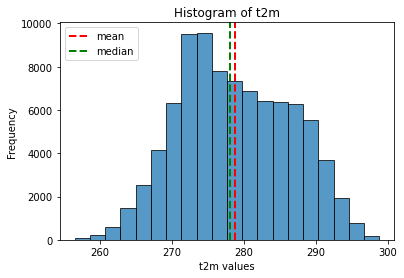

In [ ]:
import matplotlib.pyplot as plt

# Get the values of t2m
t2m_values = new_df['t2m'].dropna()

# Plot the histogram
n, bins, patches = plt.hist(t2m_values, bins=20, edgecolor='black', alpha=0.75)

# Calculate the mean and median
mean = t2m_values.mean()
median = t2m_values.median()

# Add lines for mean and median
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='median')

# Add legend
plt.legend(loc='upper left')

# Add title and labels
plt.title('Histogram of t2m')
plt.xlabel('t2m values')
plt.ylabel('Frequency')

# Show plot
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


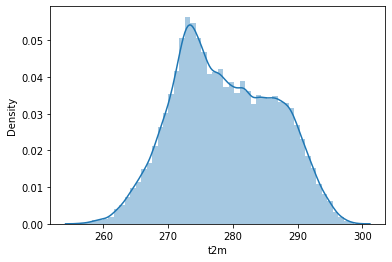

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(new_df['t2m'].dropna(), hist=True, kde=True, rug=False)

plt.show()


In [ ]:
import scipy.stats as stats
import numpy as np

# calculate the CDF
x = new_df['t2m'].dropna()
cdf = stats.norm.cdf(x, loc=np.mean(x), scale=np.std(x))

# calculate the percentage of data to the left and right of the density curve
left = cdf[x < np.mean(x)].sum() / len(cdf)
right = 1 - left


In [ ]:
print(left)

0.12654811785095427


In [ ]:
print(right)

0.8734518821490458


In [ ]:
# Load temperature data
tempt = df.variables['t2m'] # temperature variable
print(tempt)

<class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, expver, latitude, longitude)
    scale_factor: 0.000644746879673218
    add_offset: 277.6509227437477
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (87672, 2, 1, 1)
filling on


In [ ]:
# convert it to celcius
tempt = df['t2m'][:,0,0,0]-273.15
tempt

masked_array(data=[-0.3391920819591405, -0.4932865862010658,
                   -0.36627145090540125, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-32767)

In [ ]:
#number of missing data point
np.sum([int(i) for i in tempt.mask])

744

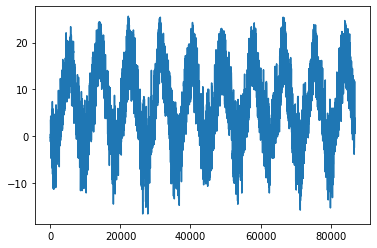

In [ ]:
plt.plot(tempt)

# 2(f) 
**Experiment with the number of input steps for your model to predict the temperature for the next 6 hours, e.g. using the past 6 hours, the past 12 hours or the past 24 hours**.

In [ ]:
past_history = 12
future_target = 6

# 2(b) 
**Training and testing data. Use 80% of the data for training and 20% of the data for testing. Since the data represents a time series, which has a natural ordering, be careful how you split and/or shuffle the data.**

### Split Data: 80% of the data used for training and 20% for validation.

In [ ]:
TRAIN_SPLIT = int(0.8*len(tempt))
print(TRAIN_SPLIT)

70137


### Generate Data Samples

In [ ]:
import numpy as np

def generate_samples(dataset, target, start_index, end_index, history_size, target_size, step, single_step = False):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
      # Define the indices of the window
      indices = range(i-history_size, i, step)
      data.append(dataset[indices])

      if single_step:
        labels.append(target[i + target_size])
      else:
        labels.append(target[i: i + target_size]) 
    return np.array(data), np.array(labels)

In [ ]:
STEP = 1

#training samples
x_train, y_train = generate_samples(tempt, tempt, 0, TRAIN_SPLIT, past_history, future_target, STEP)

#test samples
x_test, y_test = generate_samples(tempt, tempt, TRAIN_SPLIT, None, past_history, future_target, STEP)

In [ ]:
print(y_train.shape)

(70125, 6)


In [ ]:
print(y_test.shape)

(17517, 6)


# 2(a) 
**Develop suitable baseline models. The simplest baseline for a prediction task like this is the so-called persistence prediction: You simply assume that the temperature for the next 6 hours will be the same as the last observed temperature. A second baseline is a simple linear regression model.**

**simplest baseline**

In [ ]:
# persistence prediction model
def persistence_predict(history):
    return history[-future_target:]

# get the last future_target values of the training data
last_train_temp = tempt[TRAIN_SPLIT-past_history:]

# predict using the persistence prediction model
y_pred_persistence = []
for i in range(len(y_test)):
    y_pred_persistence.append(persistence_predict(last_train_temp))
    last_train_temp = np.append(last_train_temp[1:], y_pred_persistence[-1])

# calculate the mean absolute error
mae_persistence = tf.keras.metrics.mean_absolute_error(y_test, y_pred_persistence).numpy()
#print('MAE of persistence prediction model: {:.2f}'.format(mae_persistence.item()))
print('MAE of persistence prediction model: {:.2f}'.format(np.mean(mae_persistence)))


MAE of persistence prediction model: 31385.25


**A second baseline is a simple linear regression model.**

In [ ]:
from sklearn.linear_model import LinearRegression
# create and fit the model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# predict using the linear regression model
y_pred_lr = lr_model.predict(x_test)

# calculate the mean absolute error
mae_lr = tf.keras.metrics.mean_absolute_error(y_test, y_pred_lr).numpy()
print('MAE of linear regression model: {:.2f}'.format(np.mean(mae_lr)))
#print('MAE of linear regression model: {:.2f}'.format(mae_lr))

MAE of linear regression model: 35.94


#MLP

In [ ]:
# Normalize the Data
train_max = np.max(x_train)
train_min = np.min(x_train)

x_train = (x_train - train_min)/(train_max - train_min)
x_test = (x_test - train_min)/(train_max - train_min)
y_train = (y_train - train_min)/(train_max - train_min)
y_test = (y_test - train_min)/(train_max - train_min)

In [ ]:
# drop the last part of the dataset to avoid missing values
x_test = x_test[:16000]
y_test = y_test[:16000]
print(x_test.shape)
print(y_test.shape)

(16000, 12)
(16000, 6)


### Define and Train MLP model

In [ ]:
inp = tf.keras.layers.Input(shape=(past_history,))
b = tf.keras.layers.Dense(units = 128, activation = 'relu')(inp)
b = tf.keras.layers.Dense(units = 128, activation = 'relu')(b)
outp = tf.keras.layers.Dense(future_target, activation = 'linear')(b)

model = tf.keras.models.Model(inp, outp)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 18,950
Trainable params: 18,950
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, validation_split = 0.1)

Epoch 1/20
987/987 [==============================] - 4s 4ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3/20
987/987 [==============================] - 2s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/20
987/987 [==============================] - 2s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/20
987/987 [==============================] - 4s 4ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/20
987/987 [==============================] - 2s 2ms/step - loss: 0.

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))
  
  plt.figure()

  plt.semilogy(epochs, loss, 'b', label = 'Training Loss')
  plt.semilogy(epochs, val_loss, 'r', label = 'Validation Loss')
  plt.title(title)
  plt.legend()
  
  plt.show()

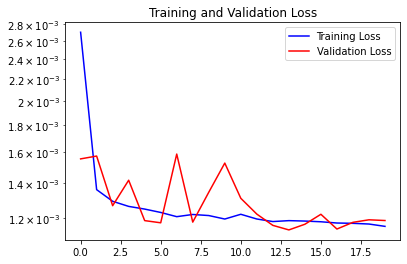

In [ ]:
plot_train_history(history, 'Training and Validation Loss')

# 2(c) 
**Experiment with various hyperparameter for your neural network model, e.g. varying the number of hidden layers, units per layer, activation functions, etc.**

**Define and Train MLP model**

In [ ]:
inp1 = tf.keras.layers.Input(shape=(past_history,))
b1 = tf.keras.layers.Dense(units = 512, activation = 'sigmoid')(inp1)
b1 = tf.keras.layers.Dense(units = 256, activation = 'sigmoid')(b1)
outp1 = tf.keras.layers.Dense(future_target, activation = 'softmax')(b1)

model1 = tf.keras.models.Model(inp1, outp1)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_3 (Dense)             (None, 512)               6656      
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 139,526
Trainable params: 139,526
Non-trainable params: 0
_________________________________________________________________


**Compile the model**

In [ ]:
model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [ ]:
history1 = model1.fit(x_train, y_train, batch_size = 64, epochs = 20, validation_split = 0.1)

Epoch 1/20
987/987 [==============================] - 9s 8ms/step - loss: 0.1600 - mse: 0.1600 - val_loss: 0.1857 - val_mse: 0.1857
Epoch 2/20
987/987 [==============================] - 6s 6ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.1857 - val_mse: 0.1857
Epoch 3/20
987/987 [==============================] - 9s 9ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.1857 - val_mse: 0.1857
Epoch 4/20
987/987 [==============================] - 6s 6ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.1857 - val_mse: 0.1857
Epoch 5/20
987/987 [==============================] - 10s 10ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.1857 - val_mse: 0.1857
Epoch 6/20
987/987 [==============================] - 6s 6ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.1856 - val_mse: 0.1856
Epoch 7/20
987/987 [==============================] - 8s 8ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.1856 - val_mse: 0.1856
Epoch 8/20
987/987 [==============================] - 6s 6ms/step - loss: 

In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.semilogy(epochs, loss, 'b', label='Training Loss')
    plt.semilogy(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(title)
    plt.legend()

    plt.show()

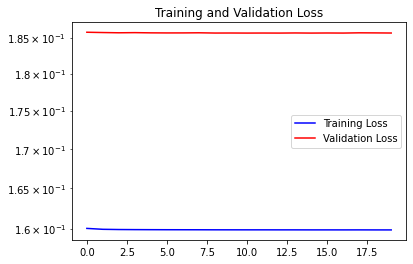

In [ ]:
plot_train_history(history1, 'Training and Validation Loss')

# (d) Visualize some of the predictions from the two baseline models and the feedforward NN model, along with the true labels.

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

lm_pred = lm.predict(x_test)

### Prediction on test dataset for MLP, Linear Model and Persistence

In [ ]:
past_history = 12
future_target = 6

In [ ]:
# Prediction on test datasets for MLP
mlp_pred = model.predict(x_test)

# Prediction on test datasets for Linear
lm_pred = lm.predict(x_test)

# Persistence Prediction
pers_pred = np.repeat(np.expand_dims(x_test[:, past_history-1], axis = 1), future_target, axis = 1)

500/500 [==============================] - 1s 1ms/step


### Plot the results


### Reverse the Normalization

In [ ]:
def plot_results(x, true_pred, lm_pred, pers_pred, mlp_pred, ix):


  x = (train_max - train_min)*x + train_min
  true_pred = (train_max - train_min)*true_pred + train_min
  pers_pred = (train_max - train_min)*pers_pred + train_min
  lm_pred = (train_max - train_min)*lm_pred + train_min
  mlp_pred = (train_max - train_min)*mlp_pred + train_min

# Input Data
  plt.plot(np.arange(-past_history+1, 1), x[ix], 'k--')

#Persistence Prediction
  plt.plot(np.arange(1, future_target+1), pers_pred[ix], 'g')

# MLP prediction
  plt.plot(np.arange(1, future_target+1), mlp_pred[ix], 'b')

#True Observed Future
  plt.plot(np.arange(1, future_target+1), true_pred[ix], 'r')

#Legend
  plt.legend(["Input Tempt", "Persistence", "Linear", "MLP", "True Tempt"])
  plt.grid()
  plt.xlabel("Input [h]")
  plt.ylabel("Temperature [c]")

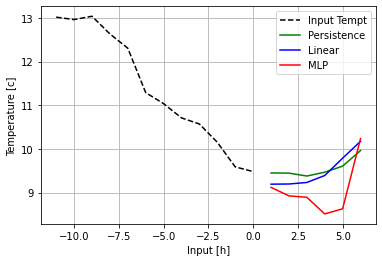

In [ ]:
plot_results(x_test, y_test, pers_pred, lm_pred, mlp_pred, np.random.randint(0, len(y_test)))

# (e)Verify the models on the test dataset, using the mean squared error as verification metric. In particular, plot the mean squared error of the models as a function of the prediction time step.

#### MSE

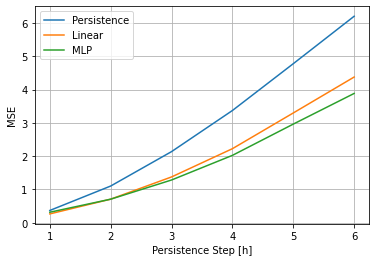

In [ ]:
pers_mse = np.zeros(future_target)
lm_mse = np.zeros(future_target)
mlp_mse = np.zeros(future_target)

for i in range(future_target):
  pers_mse[i] = np.mean(np.square(y_test[:, i] - pers_pred[:, i]))
  lm_mse[i] = np.mean(np.square(y_test[:, i] - lm_pred[:, i]))
  mlp_mse[i] = np.mean(np.square(y_test[:, i] - mlp_pred[:, i]))

plt.plot(np.arange(1, future_target+1), pers_mse*(train_max - train_min)**2)
plt.plot(np.arange(1, future_target+1), lm_mse*(train_max - train_min)**2)
plt.plot(np.arange(1, future_target+1), mlp_mse*(train_max - train_min)**2)

plt.legend(["Persistence", "Linear", "MLP"])
plt.xlabel("Persistence Step [h]")
plt.ylabel("MSE")
plt.grid()

In [ ]:
print(lm_mse)

[0.00014902 0.00039705 0.00077099 0.00124622 0.001847   0.00245145]


In [ ]:
print(mlp_mse)

[0.00017722 0.00039673 0.00071945 0.00113379 0.00165975 0.00217545]


# 2(g) 
**(g) Can your feedforward neural network models beat the two baselines consistently?**

In [ ]:
print(pers_mse*100)

[0.02068493 0.0617914  0.1196825  0.18882262 0.26759176 0.34737999]


In [ ]:
print(lm_mse*100)

[0.01490214 0.03970518 0.07709869 0.12462168 0.18470013 0.24514525]


In [ ]:
print(mlp_mse*100)

[0.01772248 0.0396733  0.0719445  0.11337868 0.16597545 0.21754469]


Based on the mean squared error (MSE), it appears that the feedforward neural network (mlp_mse) outperforms the persistence model (pers_mse) consistently, but it does not consistently outperform the linear model (lm_mse).

For instance, looking at the first two data points, the MLP has a higher MSE than the linear model, while both models outperform the persistence model. However, for the remaining four data points, the MLP has a lower MSE than both the persistence model and the linear model.

Therefore, while the feedforward neural network does appear to be a better model than the persistence model, it is not consistently better than the linear model. Further analysis and evaluation may be required to determine the overall best model for the specific task at hand. 


